In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib as plt

In [6]:
data=pd.read_csv('college_majors.csv')

In [8]:
data.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972


In [10]:
data.shape

(173, 21)

In [13]:
data.isnull().sum()

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [15]:
data.dropna(axis=0,inplace=True)

In [16]:
data.isna().sum()

Rank                    0
Major_code              0
Major                   0
Total                   0
Men                     0
Women                   0
Major_category          0
ShareWomen              0
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [17]:
data.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972


<AxesSubplot: ylabel='count'>

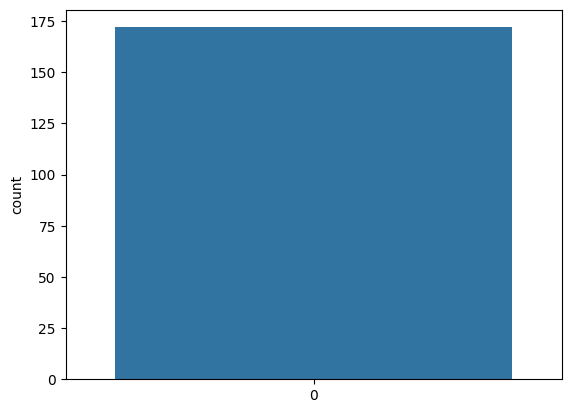

In [34]:
sns.countplot(data['Rank'])

In [37]:
set=data['Major'][0]
set


'PETROLEUM ENGINEERING'

In [35]:
import re

In [38]:
re.sub('[^a-zA-Z]',' ',set)

'PETROLEUM ENGINEERING'

In [39]:
set=set.lower()
set

'petroleum engineering'

In [40]:
list =set.split()
list

['petroleum', 'engineering']

In [68]:
#remove the stopwords from the text
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [69]:

from nltk.stem import PorterStemmer
pst=PorterStemmer()


In [58]:
pst.stem("engineering")

'engin'

In [72]:
words_to_stem = ["engin","engineer","engineering","engineers"]
for words in words_to_stem:
    print(words+ ":" +pst.stem(words))

engin:engin
engineer:engin
engineering:engin
engineers:engin


In [73]:
from nltk.stem import LancasterStemmer
lst=LancasterStemmer()
for words in words_to_stem:
    print(words+ ":" +lst.stem(words))

engin:engin
engineer:engin
engineering:engin
engineers:engin


In [74]:
from nltk.stem import SnowballStemmer
sbst = SnowballStemmer('english')

In [75]:
for words in words_to_stem:
    print(words+ ":" +sbst.stem(words))

engin:engin
engineer:engin
engineering:engin
engineers:engin


In [89]:
def stem_it(Major):
    return[sbst.stem(word) for word in Major]


In [91]:
data['Major']=data['Major'].apply(stem_it)
data

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,"[p, e, t, r, o, l, e, u, m, , e, n, g, i, n, ...",2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,"[m, i, n, i, n, g, , a, n, d, , m, i, n, e, ...",756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,"[m, e, t, a, l, l, u, r, g, i, c, a, l, , e, ...",856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,"[n, a, v, a, l, , a, r, c, h, i, t, e, c, t, ...",1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,"[c, h, e, m, i, c, a, l, , e, n, g, i, n, e, ...",32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,"[z, o, o, l, o, g, y]",8409.0,3050.0,5359.0,Biology & Life Science,0.6373,47,6259,...,2190,3602,304,0.0463,26000,20000,39000,2771,2947,743
169,170,5201,"[e, d, u, c, a, t, i, o, n, a, l, , p, s, y, ...",2854.0,522.0,2332.0,Psychology & Social Work,0.8171,7,2125,...,572,1211,148,0.0651,25000,24000,34000,1488,615,82
170,171,5202,"[c, l, i, n, i, c, a, l, , p, s, y, c, h, o, ...",2838.0,568.0,2270.0,Psychology & Social Work,0.7999,13,2101,...,648,1293,368,0.1490,25000,25000,40000,986,870,622
171,172,5203,"[c, o, u, n, s, e, l, i, n, g, , p, s, y, c, ...",4626.0,931.0,3695.0,Psychology & Social Work,0.7987,21,3777,...,965,2738,214,0.0536,23400,19200,26000,2403,1245,308


In [94]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [98]:
data['Major']=data['Major'].apply(' '.join)
data

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,p e t r o l e u m e n ...,2339.0,2057.0,282.0,Engineering,0.1206,36,1976,...,270,1207,37,0.0184,110000,95000,125000,1534,364,193
1,2,2416,m i n i n g a n d m ...,756.0,679.0,77.0,Engineering,0.1019,7,640,...,170,388,85,0.1172,75000,55000,90000,350,257,50
2,3,2415,m e t a l l u r g i c a ...,856.0,725.0,131.0,Engineering,0.1530,3,648,...,133,340,16,0.0241,73000,50000,105000,456,176,0
3,4,2417,n a v a l a r c h i t ...,1258.0,1123.0,135.0,Engineering,0.1073,16,758,...,150,692,40,0.0501,70000,43000,80000,529,102,0
4,5,2405,c h e m i c a l e n g ...,32260.0,21239.0,11021.0,Engineering,0.3416,289,25694,...,5180,16697,1672,0.0611,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,z o o l o g y,8409.0,3050.0,5359.0,Biology & Life Science,0.6373,47,6259,...,2190,3602,304,0.0463,26000,20000,39000,2771,2947,743
169,170,5201,e d u c a t i o n a l ...,2854.0,522.0,2332.0,Psychology & Social Work,0.8171,7,2125,...,572,1211,148,0.0651,25000,24000,34000,1488,615,82
170,171,5202,c l i n i c a l p s y ...,2838.0,568.0,2270.0,Psychology & Social Work,0.7999,13,2101,...,648,1293,368,0.1490,25000,25000,40000,986,870,622
171,172,5203,c o u n s e l i n g p ...,4626.0,931.0,3695.0,Psychology & Social Work,0.7987,21,3777,...,965,2738,214,0.0536,23400,19200,26000,2403,1245,308


In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(data['Major_category'], data["Engineering"],test_size=0.25)

KeyError: 'Engineering'